In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf

In [3]:
no2 = pd.read_csv('C:/Users/alket/OneDrive/Desktop/ProgettoForecasting/datasets/CleanData_No2.csv')

In [4]:
no2

,datetime,NO2 (Biossido di azoto)
0,2020-01-01 00:00:00,16.0
1,2020-01-01 1:00:00,26.0
2,2020-01-01 2:00:00,25.0
3,2020-01-01 3:00:00,24.0
4,2020-01-01 4:00:00,32.0
...,...,...
6930,2020-10-15 20:00:00,43.0
6931,2020-10-15 21:00:00,37.0
6932,2020-10-15 22:00:00,38.0
6933,2020-10-15 23:00:00,33.0


In [5]:
serie = no2['NO2 (Biossido di azoto)'].values

In [6]:
def split_sequence(data, n_input, n_output):
    X, Y = list(), list()
    
    for i in range(len(data)):
        end_ix = n_input + i
        out_end_ix = end_ix + n_output
        
        if out_end_ix > len(data):
            break
            
        seq_x, seq_y = data[i:end_ix], data[end_ix:out_end_ix]
        
        X.append(seq_x)
        Y.append(seq_y)
        
    return np.array(X), np.array(Y)  

In [10]:
nr_input_steps = 12
nr_output_steps = 4
X, y = split_sequence(serie, nr_input_steps, nr_output_steps)

In [11]:
counter = 0
for i in range(len(X)):
    print(X[i], y[i])
    counter += 1
    if counter > 3 : break

[16. 26. 25. 24. 32. 21. 18. 26. 29. 29. 22. 23.] [27. 24. 23. 28.]
[26. 25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27.] [24. 23. 28. 36.]
[25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24.] [23. 28. 36. 49.]
[24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23.] [28. 36. 49. 54.]


In [12]:
size = 0.80
size_X = int(len(X)*size) 
size_y = int(len(y)*size)
X_train, y_train = X[:size_X], y[:size_y]
X_test, y_test = X[size_X:], y[size_y:]

In [14]:
len(X_test)

1384

In [31]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(800, activation='relu', input_dim=nr_input_steps)) 
#model.add(tf.keras.layers.Dense(250, activation = 'relu'))
#model.add(tf.keras.layers.Dense(50, activation = 'relu'))
model.add(tf.keras.layers.Dense(nr_output_steps))
model.compile(optimizer='adam',  loss='mse' , metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=500, verbose=2)

Epoch 1/500
35/35 - 0s - loss: 198.8564 - accuracy: 0.3347 - val_loss: 34.5176 - val_accuracy: 0.4964
Epoch 2/500
35/35 - 0s - loss: 106.4878 - accuracy: 0.4402 - val_loss: 31.1389 - val_accuracy: 0.4838
Epoch 3/500
35/35 - 0s - loss: 98.3118 - accuracy: 0.4332 - val_loss: 29.6541 - val_accuracy: 0.4603
Epoch 4/500
35/35 - 0s - loss: 93.1707 - accuracy: 0.4474 - val_loss: 28.9027 - val_accuracy: 0.4991
Epoch 5/500
35/35 - 0s - loss: 91.2600 - accuracy: 0.4510 - val_loss: 28.3655 - val_accuracy: 0.4892
Epoch 6/500
35/35 - 0s - loss: 88.4489 - accuracy: 0.4557 - val_loss: 28.1644 - val_accuracy: 0.4747
Epoch 7/500
35/35 - 0s - loss: 87.4257 - accuracy: 0.4553 - val_loss: 27.8320 - val_accuracy: 0.4946
Epoch 8/500
35/35 - 0s - loss: 87.5599 - accuracy: 0.4381 - val_loss: 28.1841 - val_accuracy: 0.4955
Epoch 9/500
35/35 - 0s - loss: 85.3944 - accuracy: 0.4548 - val_loss: 28.7329 - val_accuracy: 0.4901
Epoch 10/500
35/35 - 0s - loss: 85.1214 - accuracy: 0.4472 - val_loss: 27.5778 - val_accu

Epoch 82/500
35/35 - 0s - loss: 75.3447 - accuracy: 0.4643 - val_loss: 32.3631 - val_accuracy: 0.4549
Epoch 83/500
35/35 - 0s - loss: 75.2895 - accuracy: 0.4605 - val_loss: 28.2217 - val_accuracy: 0.4404
Epoch 84/500
35/35 - 0s - loss: 75.0234 - accuracy: 0.4596 - val_loss: 30.4810 - val_accuracy: 0.4341
Epoch 85/500
35/35 - 0s - loss: 75.1988 - accuracy: 0.4578 - val_loss: 28.5639 - val_accuracy: 0.4233
Epoch 86/500
35/35 - 0s - loss: 75.1224 - accuracy: 0.4587 - val_loss: 28.5978 - val_accuracy: 0.4296
Epoch 87/500
35/35 - 0s - loss: 75.2786 - accuracy: 0.4661 - val_loss: 27.1019 - val_accuracy: 0.4143
Epoch 88/500
35/35 - 0s - loss: 75.5712 - accuracy: 0.4514 - val_loss: 28.6759 - val_accuracy: 0.4251
Epoch 89/500
35/35 - 0s - loss: 74.1835 - accuracy: 0.4492 - val_loss: 27.1491 - val_accuracy: 0.4332
Epoch 90/500
35/35 - 0s - loss: 74.5952 - accuracy: 0.4627 - val_loss: 27.0121 - val_accuracy: 0.4513
Epoch 91/500
35/35 - 0s - loss: 74.2841 - accuracy: 0.4670 - val_loss: 32.8895 - v

Epoch 162/500
35/35 - 0s - loss: 70.2648 - accuracy: 0.4700 - val_loss: 31.2057 - val_accuracy: 0.3944
Epoch 163/500
35/35 - 0s - loss: 71.2083 - accuracy: 0.4612 - val_loss: 31.6414 - val_accuracy: 0.4359
Epoch 164/500
35/35 - 0s - loss: 69.6176 - accuracy: 0.4695 - val_loss: 31.6658 - val_accuracy: 0.3989
Epoch 165/500
35/35 - 0s - loss: 69.2366 - accuracy: 0.4578 - val_loss: 29.0825 - val_accuracy: 0.4242
Epoch 166/500
35/35 - 0s - loss: 69.1003 - accuracy: 0.4670 - val_loss: 29.0140 - val_accuracy: 0.4350
Epoch 167/500
35/35 - 0s - loss: 69.4555 - accuracy: 0.4686 - val_loss: 30.8104 - val_accuracy: 0.4242
Epoch 168/500
35/35 - 0s - loss: 69.6647 - accuracy: 0.4630 - val_loss: 30.9738 - val_accuracy: 0.4161
Epoch 169/500
35/35 - 0s - loss: 69.3812 - accuracy: 0.4688 - val_loss: 30.9086 - val_accuracy: 0.4323
Epoch 170/500
35/35 - 0s - loss: 70.8745 - accuracy: 0.4731 - val_loss: 27.5356 - val_accuracy: 0.4395
Epoch 171/500
35/35 - 0s - loss: 70.0320 - accuracy: 0.4695 - val_loss: 2

Epoch 242/500
35/35 - 0s - loss: 65.2271 - accuracy: 0.4781 - val_loss: 30.3531 - val_accuracy: 0.4260
Epoch 243/500
35/35 - 0s - loss: 65.7793 - accuracy: 0.4711 - val_loss: 29.2382 - val_accuracy: 0.4260
Epoch 244/500
35/35 - 0s - loss: 65.8140 - accuracy: 0.4855 - val_loss: 29.8782 - val_accuracy: 0.4143
Epoch 245/500
35/35 - 0s - loss: 64.9754 - accuracy: 0.4749 - val_loss: 33.8250 - val_accuracy: 0.4323
Epoch 246/500
35/35 - 0s - loss: 64.5538 - accuracy: 0.4756 - val_loss: 35.0366 - val_accuracy: 0.4043
Epoch 247/500
35/35 - 0s - loss: 64.8216 - accuracy: 0.4713 - val_loss: 30.9769 - val_accuracy: 0.4125
Epoch 248/500
35/35 - 0s - loss: 66.4335 - accuracy: 0.4706 - val_loss: 29.9821 - val_accuracy: 0.4224
Epoch 249/500
35/35 - 0s - loss: 66.1859 - accuracy: 0.4824 - val_loss: 32.2068 - val_accuracy: 0.4016
Epoch 250/500
35/35 - 0s - loss: 64.5554 - accuracy: 0.4767 - val_loss: 32.4753 - val_accuracy: 0.4440
Epoch 251/500
35/35 - 0s - loss: 64.5424 - accuracy: 0.4695 - val_loss: 3

Epoch 322/500
35/35 - 0s - loss: 59.9059 - accuracy: 0.4860 - val_loss: 33.2256 - val_accuracy: 0.4233
Epoch 323/500
35/35 - 0s - loss: 60.0629 - accuracy: 0.4878 - val_loss: 32.1756 - val_accuracy: 0.4134
Epoch 324/500
35/35 - 0s - loss: 60.9607 - accuracy: 0.4831 - val_loss: 32.0875 - val_accuracy: 0.4251
Epoch 325/500
35/35 - 0s - loss: 61.5966 - accuracy: 0.4871 - val_loss: 29.6005 - val_accuracy: 0.4477
Epoch 326/500
35/35 - 0s - loss: 60.9643 - accuracy: 0.4837 - val_loss: 32.1726 - val_accuracy: 0.4359
Epoch 327/500
35/35 - 0s - loss: 61.1740 - accuracy: 0.4840 - val_loss: 30.6654 - val_accuracy: 0.4278
Epoch 328/500
35/35 - 0s - loss: 60.6702 - accuracy: 0.4846 - val_loss: 33.1473 - val_accuracy: 0.4251
Epoch 329/500
35/35 - 0s - loss: 61.4042 - accuracy: 0.4874 - val_loss: 31.3596 - val_accuracy: 0.4052
Epoch 330/500
35/35 - 0s - loss: 60.5215 - accuracy: 0.4819 - val_loss: 31.6515 - val_accuracy: 0.4025
Epoch 331/500
35/35 - 0s - loss: 60.3261 - accuracy: 0.4905 - val_loss: 3

Epoch 402/500
35/35 - 0s - loss: 57.1595 - accuracy: 0.4964 - val_loss: 32.6926 - val_accuracy: 0.4152
Epoch 403/500
35/35 - 0s - loss: 57.2247 - accuracy: 0.4817 - val_loss: 35.1193 - val_accuracy: 0.4197
Epoch 404/500
35/35 - 0s - loss: 57.4581 - accuracy: 0.4885 - val_loss: 31.1963 - val_accuracy: 0.4413
Epoch 405/500
35/35 - 0s - loss: 56.7102 - accuracy: 0.4903 - val_loss: 31.5730 - val_accuracy: 0.4440
Epoch 406/500
35/35 - 0s - loss: 57.9680 - accuracy: 0.4959 - val_loss: 31.0600 - val_accuracy: 0.4215
Epoch 407/500
35/35 - 0s - loss: 57.5365 - accuracy: 0.4941 - val_loss: 34.8014 - val_accuracy: 0.4359
Epoch 408/500
35/35 - 0s - loss: 56.8176 - accuracy: 0.4977 - val_loss: 34.0761 - val_accuracy: 0.4025
Epoch 409/500
35/35 - 0s - loss: 56.4108 - accuracy: 0.4921 - val_loss: 34.6801 - val_accuracy: 0.4161
Epoch 410/500
35/35 - 0s - loss: 56.9117 - accuracy: 0.4962 - val_loss: 33.4399 - val_accuracy: 0.4188
Epoch 411/500
35/35 - 0s - loss: 55.9866 - accuracy: 0.5014 - val_loss: 3

Epoch 482/500
35/35 - 0s - loss: 54.9049 - accuracy: 0.4993 - val_loss: 31.4946 - val_accuracy: 0.4350
Epoch 483/500
35/35 - 0s - loss: 55.4174 - accuracy: 0.4973 - val_loss: 32.1006 - val_accuracy: 0.4079
Epoch 484/500
35/35 - 0s - loss: 53.9156 - accuracy: 0.5007 - val_loss: 34.2928 - val_accuracy: 0.3962
Epoch 485/500
35/35 - 0s - loss: 54.2408 - accuracy: 0.4980 - val_loss: 32.3676 - val_accuracy: 0.4323
Epoch 486/500
35/35 - 0s - loss: 53.3347 - accuracy: 0.5018 - val_loss: 33.1162 - val_accuracy: 0.4233
Epoch 487/500
35/35 - 0s - loss: 53.7771 - accuracy: 0.4980 - val_loss: 36.9126 - val_accuracy: 0.4242
Epoch 488/500
35/35 - 0s - loss: 54.6158 - accuracy: 0.4944 - val_loss: 31.4749 - val_accuracy: 0.4287
Epoch 489/500
35/35 - 0s - loss: 54.7520 - accuracy: 0.4989 - val_loss: 34.1021 - val_accuracy: 0.4152
Epoch 490/500
35/35 - 0s - loss: 54.2851 - accuracy: 0.4984 - val_loss: 35.2053 - val_accuracy: 0.3953
Epoch 491/500
35/35 - 0s - loss: 54.0471 - accuracy: 0.4883 - val_loss: 3

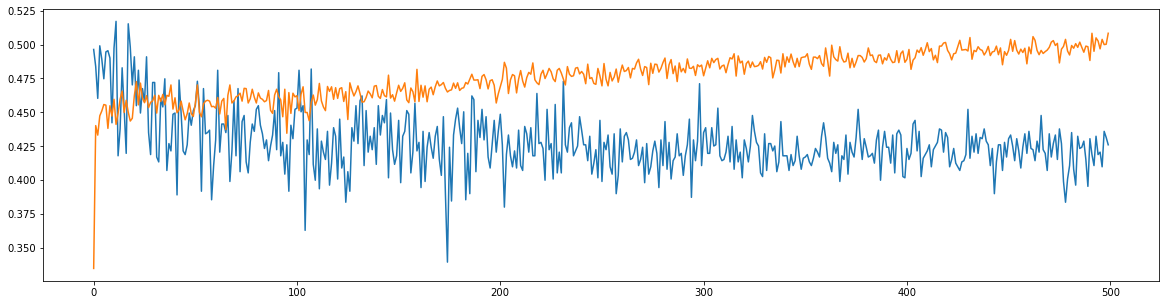

In [32]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.show()

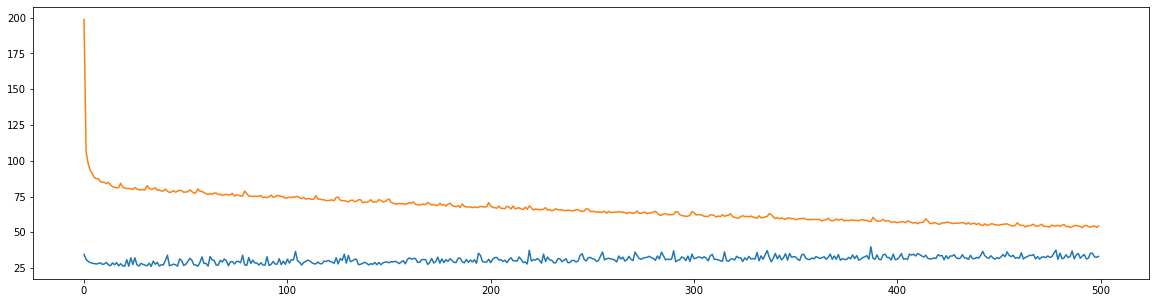

In [33]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.show()

In [19]:
# perform a prediction
x_input = np.array([16., 26. ,25. ,24. ,32., 21., 18., 26. ,29., 29. ,22., 23.]) 
x_input = x_input.reshape((1, nr_input_steps))
yhat = model.predict(x_input, verbose=2)
print(yhat[0])


1/1 - 0s
[27.714746 24.839321 20.678705 27.63124 ]


In [ ]:
# [27.     24.       23.       28.]

### Compute Error

In [35]:
# compute error
predicted = []
for i in range(len(X_test)):
    x_input = X_test[i].reshape((1, nr_input_steps))
    yhat = model.predict(x_input, verbose = 0)    
    predicted.append(np.around(yhat[0], decimals = 1))


In [36]:
predicted = np.array(predicted)

In [37]:
expected = y_test


In [39]:
error = abs(predicted - expected) 

In [40]:
error.shape

(1384, 4)

In [41]:
error_ext = np.reshape(error, error.shape[0]* error.shape[1])

In [43]:
error_ext.shape

(5536,)

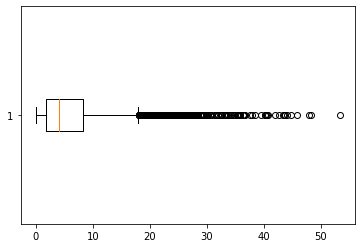

In [44]:
plt.boxplot( error_ext, vert = False)
plt.show()

In [45]:
predicted_ext = np.reshape(predicted, predicted.shape[0]* predicted.shape[1])
predicted_ext.shape

(5536,)

In [46]:
expected_ext =np.reshape(expected, expected.shape[0]* expected.shape[1])

[]

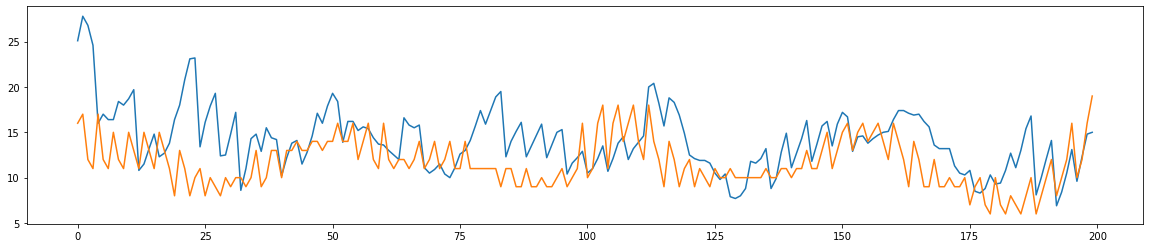

In [48]:
plt.figure(figsize = (20, 4))
plt.plot(predicted_ext[:200])
plt.plot(expected_ext[:200])
plt.plot()